In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
c:\users\user\appdata\local\programs\python\python37\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [15]:
df_ccf=pd.read_csv("creditcard.csv")

In [8]:
df_ccf.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
df_ccf.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Here we have v1 to v28 and these are actually the result pf a PCA dimensionality reduction, that was used in order to protect sensitive information in this data set.

In [10]:
df_ccf.shape

(284807, 31)

In [12]:
df_ccf.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df_ccf1=df_ccf.sample(frac=0.1,random_state=123)

df_ccf1.shape

(28481, 31)

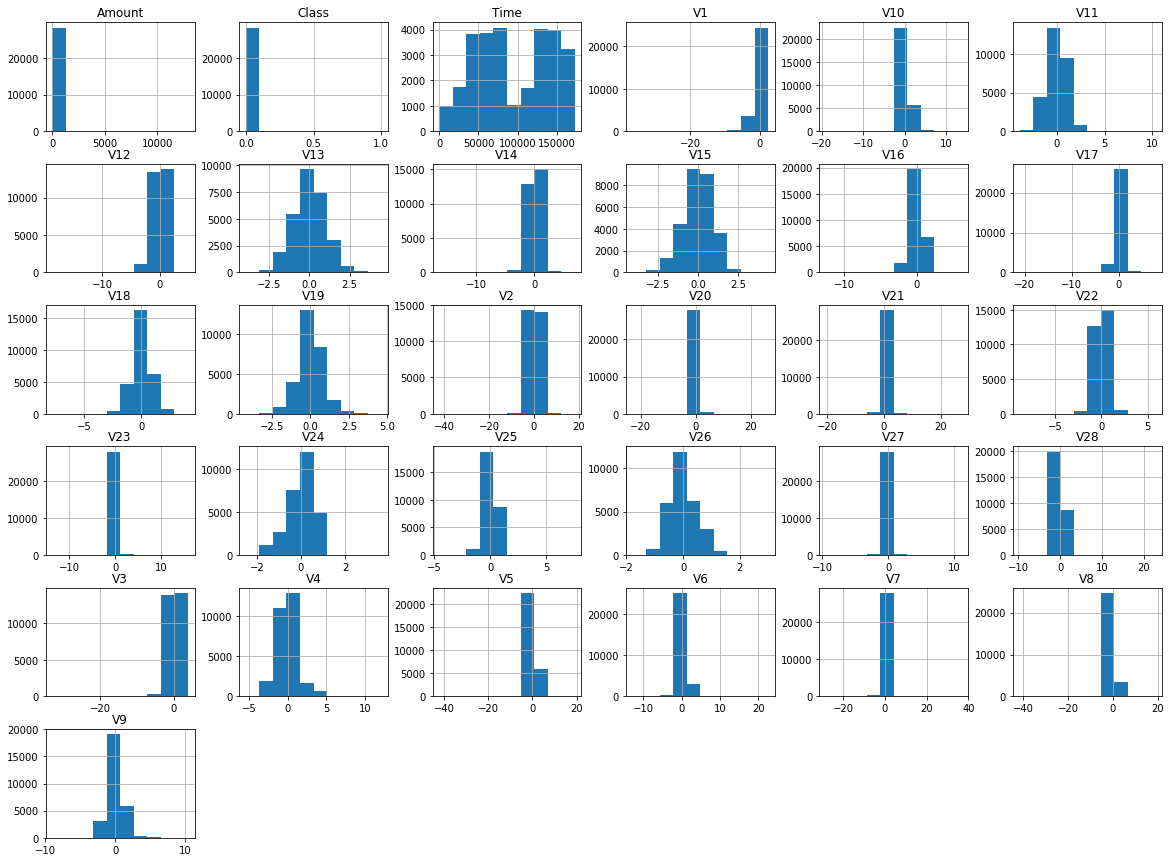

In [19]:
df_ccf1.hist(figsize=(20,15))
plt.show()

In [22]:
df_ccf["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [51]:
df_ccf1["Class"].value_counts()

0    28430
1       51
Name: Class, dtype: int64

In [46]:
outlier_fraction=51/28430
outlier_fraction

0.0017938797045374604

I'm using df_ccf1 because of computational issues.

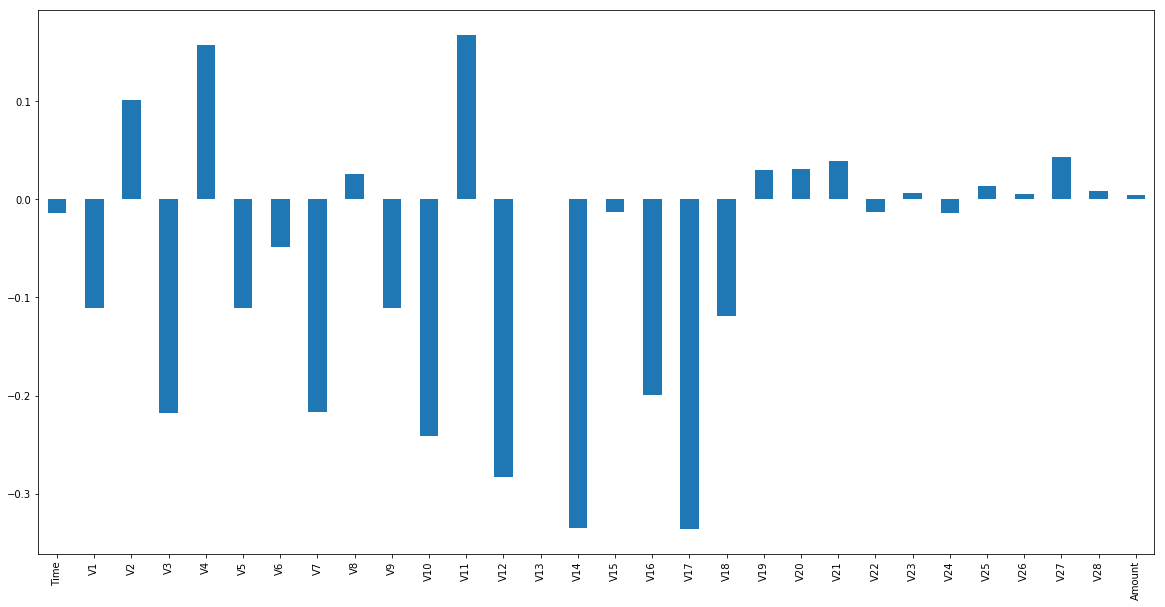

In [30]:
df_ccf1.drop(columns=["Class"]).corrwith(df_ccf1["Class"]).plot.bar(figsize=(20,10))

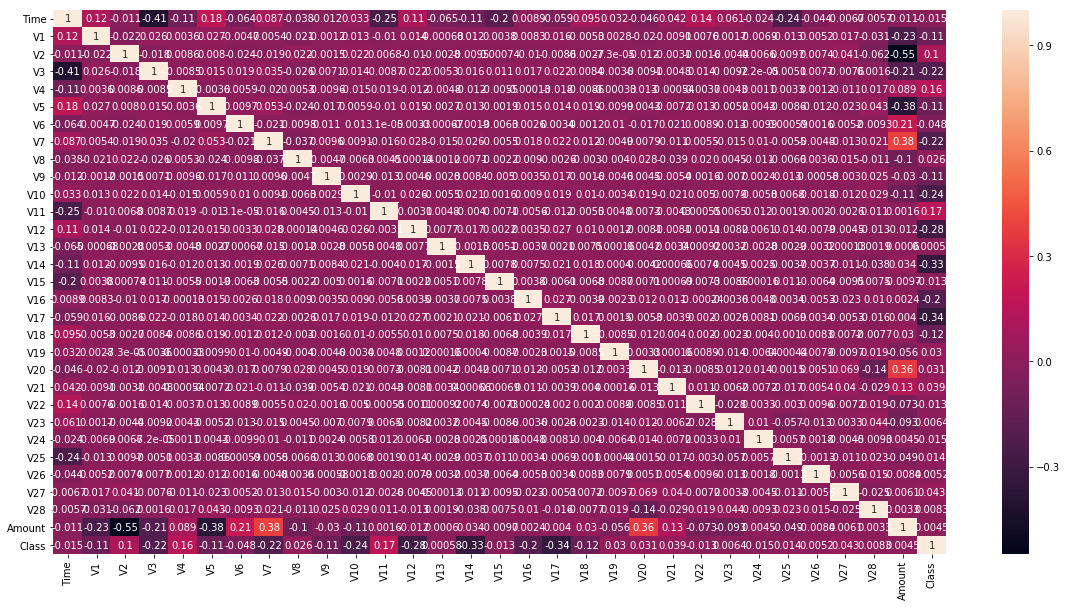

In [31]:
corr=df_ccf1.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)
plt.show()

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
from sklearn.preprocessing import StandardScaler

In [41]:
sc=StandardScaler()

In [35]:
X_train,X_test,y_train,y_test=train_test_split(df_ccf1.drop(columns=["Class"]),df_ccf1["Class"],test_size=0.3,random_state=123)

In [36]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
109853,71567.0,1.237539,0.190188,0.157131,0.512770,-0.282607,-0.592929,-0.125212,0.049207,0.020513,...,-0.155769,-0.275463,-0.900010,0.094241,-0.083165,0.180656,0.102726,-0.036861,0.013916,0.89
168646,119322.0,2.138299,-0.016122,-1.783028,0.078105,0.600378,-0.517711,0.192577,-0.269254,0.617098,...,-0.184217,0.191026,0.691115,-0.057836,0.071313,0.391430,-0.098721,-0.024652,-0.059032,1.00
12189,21267.0,1.195420,0.317045,0.762102,0.852662,-0.383452,-0.663521,-0.103559,-0.166113,1.310714,...,-0.179979,-0.358824,-0.760327,0.217900,0.332734,0.076039,0.065500,-0.039347,0.012565,2.69
266564,162385.0,-1.383958,1.255276,-0.338602,-3.460703,0.142338,-0.468138,-0.075657,-2.330057,-0.062643,...,0.323929,-1.348604,-0.023239,0.127809,0.734880,0.074554,-0.772130,-0.082428,0.077841,46.98
153197,98165.0,2.101915,0.222053,-2.028323,0.067601,0.801091,-1.175943,0.648816,-0.548157,1.151809,...,-0.226257,0.042726,0.519551,-0.086591,-0.379299,0.435050,0.205335,-0.110087,-0.097396,6.44


In [42]:
X_train=pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns.values,index=X_train.index.values)
X_test=pd.DataFrame(sc.fit_transform(X_test),columns=X_test.columns.values,index=X_test.index.values)

# X_train=X_train2
# X_test=X_test2

In [43]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
109853,-0.492764,0.628197,0.107462,0.110041,0.349483,-0.198135,-0.444210,-0.105111,0.046129,0.023978,...,-0.202861,-0.375656,-1.240582,0.169004,-0.132955,0.344018,0.209206,-0.103985,0.038630,-0.348086
168646,0.520286,1.086422,-0.017126,-1.138885,0.044826,0.441505,-0.387009,0.151354,-0.219720,0.566738,...,-0.239401,0.251889,0.949857,-0.103321,0.123549,0.746921,-0.207296,-0.072733,-0.178939,-0.347649
12189,-1.559803,0.606771,0.184069,0.499475,0.587714,-0.271188,-0.497894,-0.087636,-0.133618,1.197774,...,-0.233958,-0.487798,-1.048287,0.390439,0.557624,0.144037,0.132241,-0.110346,0.034600,-0.340933
266564,1.433803,-0.705382,0.750654,-0.209074,-2.435526,0.109698,-0.349311,-0.065118,-1.940067,-0.051675,...,0.413280,-1.819301,-0.033566,0.229112,1.225367,0.141198,-1.599600,-0.220617,0.229287,-0.164929
153197,0.071472,1.067913,0.126705,-1.296787,0.037463,0.586903,-0.887577,0.519551,-0.452546,1.053206,...,-0.293399,0.052388,0.713671,-0.154813,-0.624670,0.830303,0.421355,-0.291415,-0.293360,-0.326031


In [61]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

clssifiers={
    "IsolationForest":IsolationForest(
        max_samples=len(X_train),contamination=outlier_fraction,random_state=123),
    "LocalOutlierFactor":LocalOutlierFactor(
    n_neighbors=20, contamination=outlier_fraction,novelty=True)
}

In [62]:
n_outliers=df_ccf1["Class"].value_counts()[1]

for i, (clf_name,clf) in enumerate(clssifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred=clf.fit_predict(X_train)
        scores_pred=clf.negative_outlier_factor_
    else:
        clf.fit(X_train)
        scores_pred=clf.decision_function(X_train)
        y_pred=clf.predict(X_train)
    
    y_pred[y_pred == 1]=0
    y_pred[y_pred == -1]=1
    
    n_errors=(y_pred != y_train).sum()
    
    print("{}: {}".format(clf_name,n_errors))
    print(accuracy_score(y_train,y_pred))
    print(classification_report(y_train,y_pred))

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


IsolationForest: 49
0.9975421348314607
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19891
           1       0.44      0.36      0.40        45

   micro avg       1.00      1.00      1.00     19936
   macro avg       0.72      0.68      0.70     19936
weighted avg       1.00      1.00      1.00     19936

LocalOutlierFactor: 71
0.9964386035313002
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19891
           1       0.07      0.04      0.05        45

   micro avg       1.00      1.00      1.00     19936
   macro avg       0.53      0.52      0.53     19936
weighted avg       1.00      1.00      1.00     19936

